<a href="https://colab.research.google.com/github/thatothapo/computationalphysics/blob/main/finite_square_well.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Levels of the Finite Square Well

We want to find the energy and plot the corresponding wave function of a particle in the ground state of a finite square well.

Consider the equation, $$ l\tan(la) = κ, $$ with $l = \sqrt{2m(V_0 - ϵ)/ħ^2}$ and $κ = \sqrt{2mϵ/ħ^2}$.

In order to apply numerical methods on it, we can use it in the form, $$ F(ϵ) = l\tan(la) - κ = 0. $$ We can plot the function $F(ϵ)$ to see the neighborhood around the root:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
mc = 0.511E+6
hc = 197.3
Vo = 40.0
a = 0.05

eps1=np.linspace(20, 30, num=200)

In [12]:
def f(eps):
    l = np.sqrt((2.0*mc*(Vo-eps))/(hc**2))
    K = np.sqrt((2.0*mc*eps)/(hc**2))
    return l*np.tan(l*a)-K

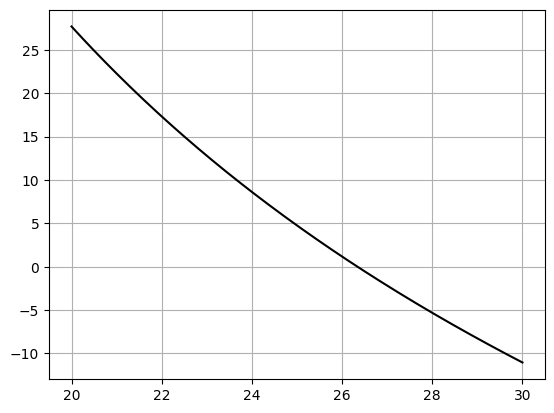

In [13]:
plt.plot(eps1, f(eps1), 'k-')
plt.grid()
plt.savefig('plot1.png', dpi=200)
plt.show()
# Need to highlight zero better

We can see the root lies between 26 and 27 in the figure above so we have our bounds for when we employ root finding methods. The first is the brute force grid search method.

In [14]:
a0 = 26
eps1 = a0
n = 0

while True:
    if f(eps1)*f(eps1+1E-5)<0:
        print(eps1, n)
        break
    else:
        eps1=eps1+1E-5
        n=n+1

# Give units, an interval and write out everything neatly.

26.343219999987006 34322


Next, we use the Bisection method, which significantly reduces the number of iterations needed to reach an even better tolerance of $1×10^{-10}$, and we get,

In [15]:
a0 = 26
b0 = 27
n = 0

while b0-a0 >= 1E-10:
    eps1=(a0+b0)/2
    if f(eps1)<0:
        b0=eps1
    elif f(eps1)>0:
        a0=eps1
    else:
        a0=b0
    n=n+1

print(eps1, '\n', n)

26.343225548102055 
 34


Using the Secant method, we see the benefits almost instantly via the number of iterations needed to get results with the same tolerance, as shown below,

In [16]:
tolerance = 1.0e-10
dx = 0.1
x0 = 25
f0 = f(x0)
x1 = x0+dx
f1 = f(x1)
n=0


while 1:
    dx = -f1*dx/(f1-f0)
    x2 = x1+dx
    f2 = f(x2)
    if abs((x2-x1)/x2)<tolerance:break
    x1, f0, f1 = x2, f1, f2
    n=n+1

print(x2,'\n',n)

26.343225548140303 
 4


For the Hydrogen atom, we have the binding energy $E_0 = -ϵ = -13.6eV$. So our function will now be a function of $V_0$ and from our definition of $l$ and $\kappa$, we keep $ϵ$ constant.

In [7]:
eps = 13.6
a = 0.05

V=np.linspace(15, 30, num=200)

In [8]:
def f(Vo):
    l = np.sqrt((2.0*mc*(Vo-eps))/(hc**2))
    K = np.sqrt((2.0*mc*eps)/(hc**2))
    return l*np.tan(l*a)-K

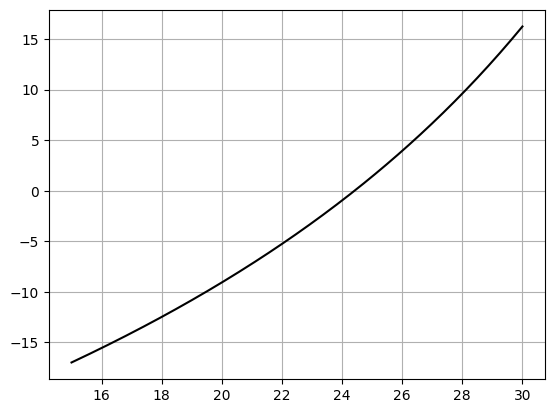

In [9]:
plt.plot(V, f(V), 'k-')
plt.grid()
plt.savefig('plot2.png', dpi=200)
plt.show()

We can see here that the root is between 24 and 25, so we can use the Bisection method again to get,

In [10]:
a0 = 22
b0 = 26
n = 0

while b0-a0 >= 1E-10:
    V=(a0+b0)/2
    f(V)
    if f(V)<0:
        a0=V
    elif f(V)>0:
        b0=V
    else:
        a0=b0
    n=n+1
#    print(eps1)

print(V, n)

24.41555648628855 36
